<br><br>
<p style="font-size:24px; color:#216594;text-align:center;">
Applied AI in Chemical and Process Engineering
</p>

<p style="font-size:30px; color:black;text-align:center;">
    Bulding ML pipeline for Reactor data
</p>


██████████████████████████████████████████████████████████████████████
<br>


**Week 3-4**

This notebook will build a pipeline to prepare data and develop an ML algorithm


# Content

**Part 1: Data Preprocessing & Exploration**

| Step                  | Description                                                                 | Key Actions & Tools                                                                                     |
|-----------------------|-----------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------|
| **Data Preparation**  | Gather, load, and inspect raw data                                          | - Load dataset (e.g., CSV, DB)<br>- Check data types, shape, initial samples (`df.head()`, `df.info()`) |
| **Data Cleaning**     | Fix issues in data quality                                                  | - Handle missing values (impute or drop)<br>- Remove duplicates<br>- Detect and treat outliers (IQR, Z-score) |
| **Exploratory Data Analysis (EDA)** | Understand data distributions and relationships                   | - Visualizations: histograms, scatter plots, pair plots<br>- Correlation matrix (heatmaps)<br>- Summary statistics |

**Part 2: Modeling & Interpretation**

| Step                                  | Description                                                                 | Key Actions & Tools                                                                                     |
|---------------------------------------|-----------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------|
| **Normalization**    | Scale features to same range (e.g., for distance-based models)              | - Apply Min-Max Scaling or Standardization<br>- Justify choice based on model needs (e.g., SVM, KNN, Neural Networks) |
| **Model Training, Validation & Testing** | Build and evaluate model performance                                    | - Split data: `train_test_split`<br>- Train models (e.g., Linear Regression, Random Forest, XGBoost)<br>- Use cross-validation<br>- Evaluate using metrics (RMSE, MAE, R², etc.) |
| **Model Explanation with XAI**        | Interpret model predictions and feature importance                          | - Use SHAP, LIME, or feature importance plots<br>- Explain predictions to stakeholders<br>- Ensure transparency and trust |


**Part 3: Optimization**

Apply wide search strategy and Bayseian optimization to find the most optimum operating parameters

**Note:** Since our example does not have categorical data, we do not encode variables - which is essential if the data is categorical 

# Ethanol Production - Sugar Industry

![Process Flow Diagram](./assets/etoh_flowdiagram.png)


**Our goal is to model residual sugar. The model can be later used to optimize the fermentation process**

**Data**
- Temperature °C: Fermentation tank
- pH: Fermentation tank
- Yeast Concentration g/L: Fermentation tank
- Sugar Concentration w/v: Dilution tank (input for fermenation)
- Residual Sugar g/L: Post-fermentation


Note: The data is simualted data


# Data Preperation

**Prompt:**
Load data from below github
https://raw.githubusercontent.com/dissabnd/Applied-AI-in-Chemical-and-Process-Engineering/refs/heads/main/data/Ethanol_Molasses_Dataset.csv


In [1]:
import pandas as pd

# Load the data
#url = "https://raw.githubusercontent.com/dissabnd/Applied-AI-in-Chemical-and-Process-Engineering/refs/heads/main/data/Ethanol_Molasses_Dataset.csv"
df = pd.read_csv('./data/Ethanol_Molasses_Dataset.csv')

# Display basic info
print(df.head())
print(df.shape)

   Temperature   pH  Yeast_Concentration  Sugar_Concentration  Residual_Sugar
0         28.7  5.0                  1.2                 12.3             5.3
1         34.5  5.4                  2.3                 10.0             5.4
2         32.3  5.1                  4.1                 17.3             3.2
3         31.0  4.3                  3.8                 19.7             2.7
4         26.6  4.0                  4.2                 12.2             5.5
(972, 5)


**Prompt:**

Print first 15 rows of the table and the dimensions of the table

In [2]:
df.head(15)

,Temperature,pH,Yeast_Concentration,Sugar_Concentration,Residual_Sugar
0,28.7,5.0,1.2,12.3,5.3
1,34.5,5.4,2.3,10.0,5.4
2,32.3,5.1,4.1,17.3,3.2
3,31.0,4.3,3.8,19.7,2.7
4,26.6,4.0,4.2,12.2,5.5
5,26.6,4.4,3.1,16.6,5.2
6,25.6,4.9,2.8,17.4,5.2
7,33.7,4.1,1.6,18.5,7.6
8,31.0,4.7,2.3,14.2,5.1
9,32.1,4.9,2.7,13.0,3.9


In [3]:
print(f"Table shape: {df.shape}")

Table shape: (972, 5)


# Data Cleaning

| Step           | Purpose                                      | Common Methods                                                                 | Notes                                                                 |
|----------------|----------------------------------------------|---------------------------------------------------------------------------------|-----------------------------------------------------------------------|
| **Missing Data** | Handle incomplete or null values             | - Remove rows/columns<br>- Impute with mean/median/mode<br>- KNN/imputation models | Can bias models; choice depends on amount and reason for missingness |
| **Duplicates**   | Remove redundant data entries                | - Identify and drop duplicate rows<br>- Use `pandas.drop_duplicates()`           | Prevents overfitting and skewed results                              |
| **Outliers**     | Detect and manage extreme values             | - Z-score, IQR method<br>- Visualization (box plots, scatter plots)<br>- Winsorizing | Can distort models; keep if meaningful (e.g., fraud detection)       |

## Check for missing data

**Prompt:**
Check if the table has missing values

In [4]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

print("\nTotal missing values in the dataset:")
print(df.isnull().sum().sum())

print("\nAny missing values in the dataset:")
print(df.isnull().values.any())

Missing values in each column:
Temperature            0
pH                     0
Yeast_Concentration    0
Sugar_Concentration    2
Residual_Sugar         0
dtype: int64

Total missing values in the dataset:
2

Any missing values in the dataset:
True


## Fill the missing data wiht median using imputer

**Prompt:**
Fill the missing data with median value

In [5]:
# Fill missing values with median
df_filled = df.fillna(df.median())

# Verify no missing values remain
print("Missing values after filling with median:")
print(df_filled.isnull().sum().sum())

Missing values after filling with median:
0


## Check for duplicates

**Prompt:**

Check if it has duplicates

In [6]:
# Check for duplicates
df_filled.duplicated()
print(f"Number of duplicate rows: {df_filled.sum()}")
print(f"Any duplicates: {df_filled.any()}")

Number of duplicate rows: Temperature            29163.7
pH                      4627.5
Yeast_Concentration     2899.0
Sugar_Concentration    14543.0
Residual_Sugar          5010.7
dtype: float64
Any duplicates: Temperature            True
pH                     True
Yeast_Concentration    True
Sugar_Concentration    True
Residual_Sugar         True
dtype: bool


# Exploratory Dara Analysis (EDA)

## Summary Stats

**Prompt:**

## Data Visualization

### Data Visualization with Box Plot


![Box plot](./assets/boxplot.png)


**Prompt:**

Create box plots for all variables in multiple plots in single figure. show outliers

In [7]:
df_filled

,Temperature,pH,Yeast_Concentration,Sugar_Concentration,Residual_Sugar
0,28.7,5.0,1.2,12.30,5.3
1,34.5,5.4,2.3,10.00,5.4
2,32.3,5.1,4.1,17.30,3.2
3,31.0,4.3,3.8,19.70,2.7
4,26.6,4.0,4.2,12.20,5.5
...,...,...,...,...,...
967,28.0,5.2,1.9,18.80,7.3
968,30.7,4.7,2.2,15.60,4.7
969,29.8,4.1,2.2,12.30,3.8
970,82.0,0.1,3.0,14.95,4.0


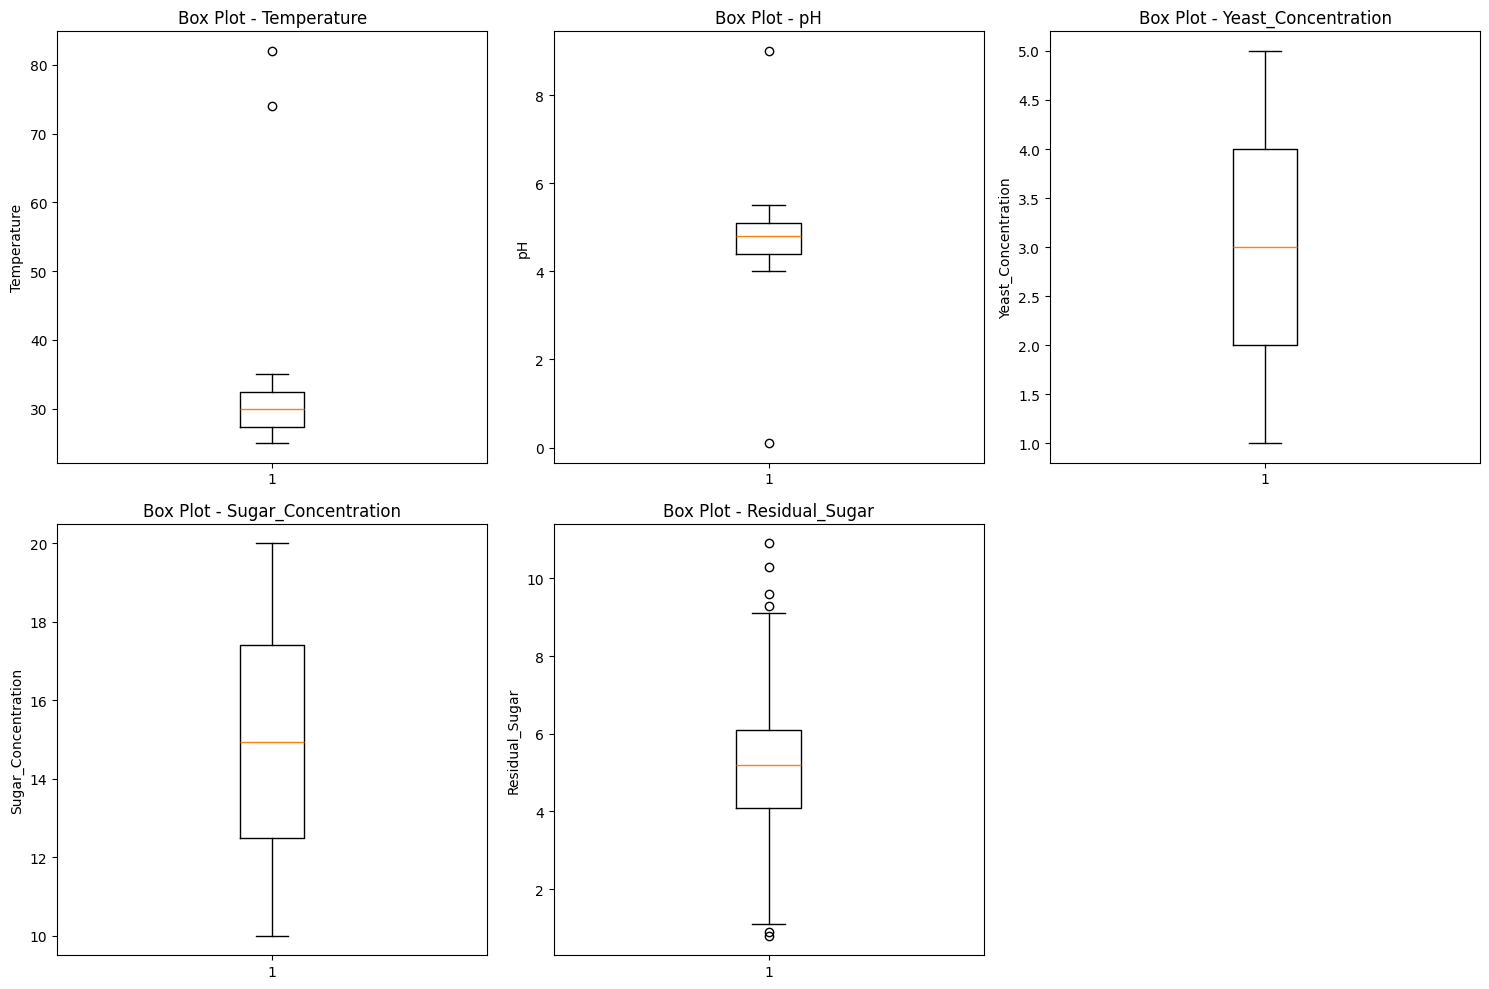

In [8]:
# Create box plots for all numeric variables
import matplotlib.pyplot as plt
import math

numeric_cols = df_filled.select_dtypes(include=['number']).columns
n_cols = len(numeric_cols)
n_rows = math.ceil(n_cols / 3)
n_subplot_cols = min(3, n_cols)

plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_subplot_cols, i + 1)
    plt.boxplot(df[col].dropna())
    plt.title(f'Box Plot - {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

### Data Visualization with Violine plot


![Violin plot](./assets/violinplot.png)


**Prompt:**

Create violine plots for all variables in multiple plots in single figure.

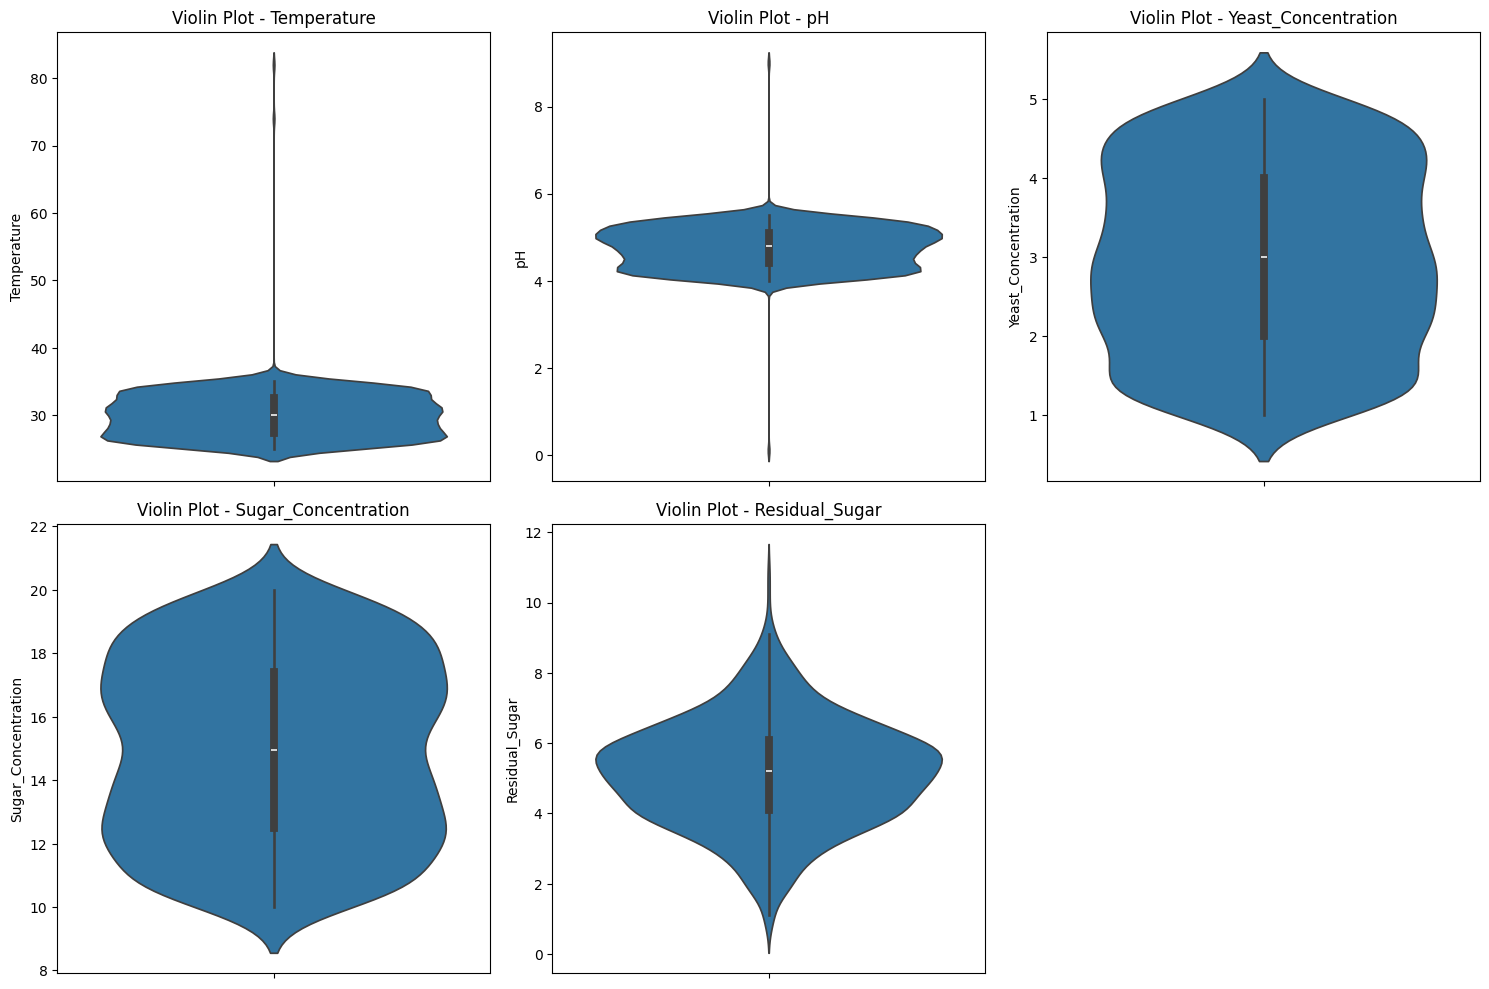

In [9]:
# Create violin plots for all numeric variables
import seaborn as sns


numeric_cols = df_filled.select_dtypes(include=['number']).columns
n_cols = len(numeric_cols)
n_rows = math.ceil(n_cols / 3)
n_subplot_cols = min(3, n_cols)

fig, axes = plt.subplots(n_rows, n_subplot_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten() if n_cols > 1 else [axes]

for i, col in enumerate(numeric_cols):
    sns.violinplot(data=df_filled, y=col, ax=axes[i])
    axes[i].set_title(f'Violin Plot - {col}')

# Hide empty subplots
for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Data Visualization with Histogram plot

**Prompt:**

Create histogram plots for all variables in multiple plots in single figure.

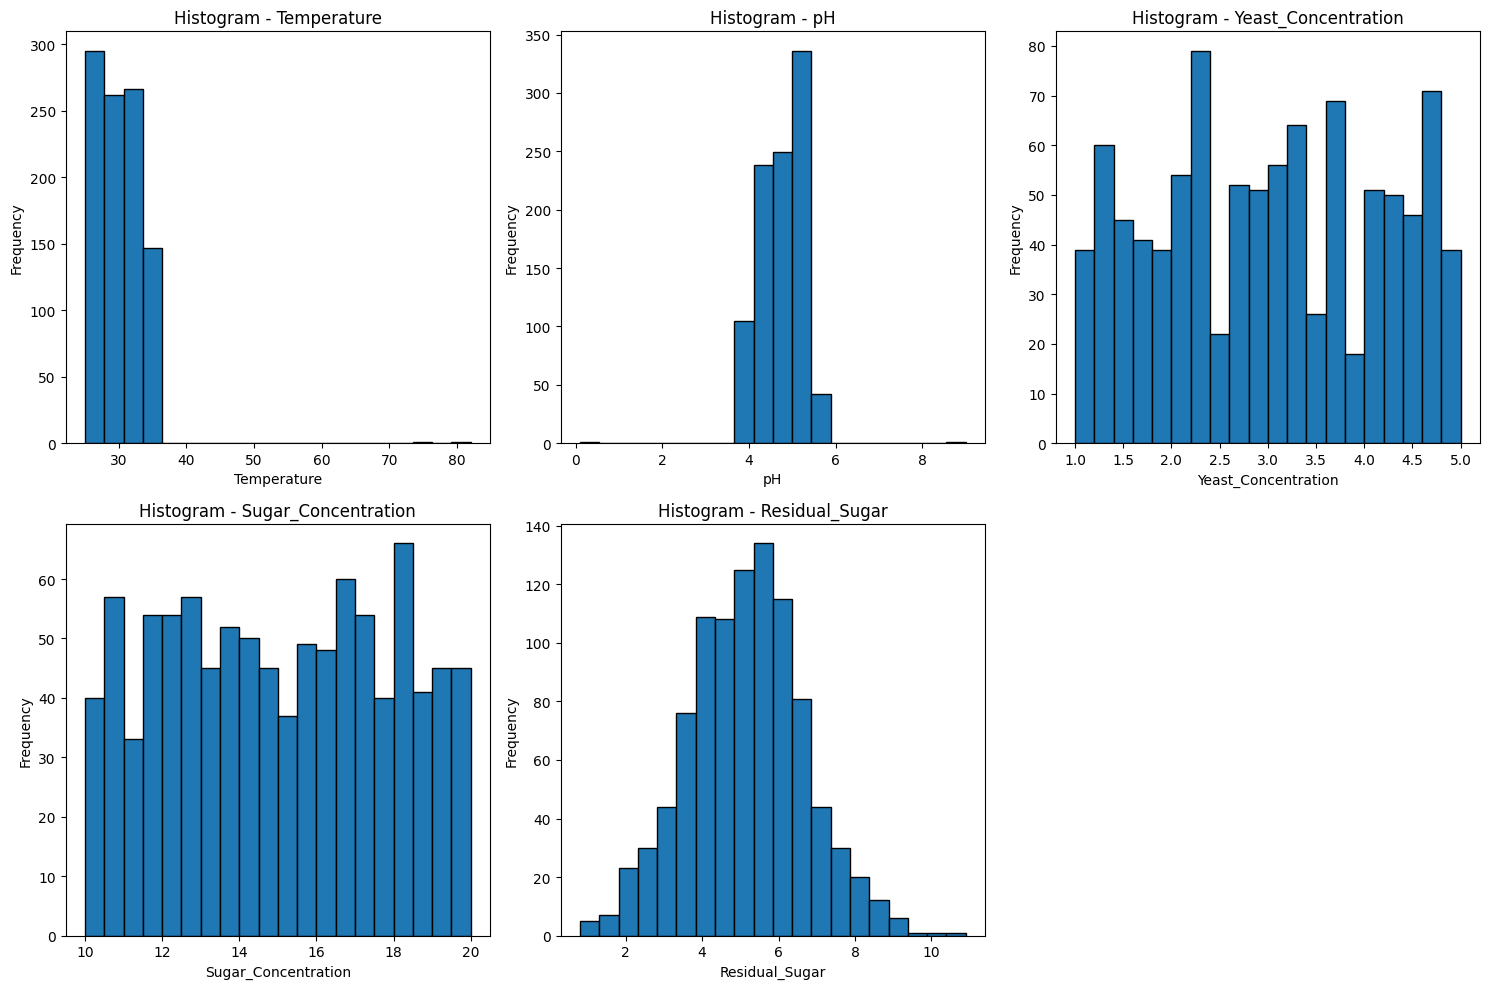

In [10]:
# Create histogram plots for all numeric variables
numeric_cols = df_filled.select_dtypes(include=['number']).columns
n_cols = len(numeric_cols)
n_rows = math.ceil(n_cols / 3)
n_subplot_cols = min(3, n_cols)

fig, axes = plt.subplots(n_rows, n_subplot_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten() if n_cols > 1 else [axes]

for i, col in enumerate(numeric_cols):
    axes[i].hist(df_filled[col].dropna(), bins=20, edgecolor='black')
    axes[i].set_title(f'Histogram - {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide empty subplots
for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## Outliers

**Strategy:** We will use statistical methods to remove outliers (IQR)

**Prompt:**

Remove all outliers of df using IQR method and create a table called dfclean

In [11]:
dfclean = df_filled.copy()

for col in numeric_cols:
    Q1 = dfclean[col].quantile(0.25)
    Q3 = dfclean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers (set to NaN and then drop)
    dfclean = dfclean[(dfclean[col] >= lower_bound) & (dfclean[col] <= upper_bound)]

print(f"Original dataset shape: {df_filled.shape}")
print(f"Dataset shape after removing outliers: {dfclean.shape}")

Original dataset shape: (972, 5)
Dataset shape after removing outliers: (964, 5)


### Histogram plot with cleaned data

**Prompt:**

Create histogram plots for all variables in multiple plots in single figure using dfclean

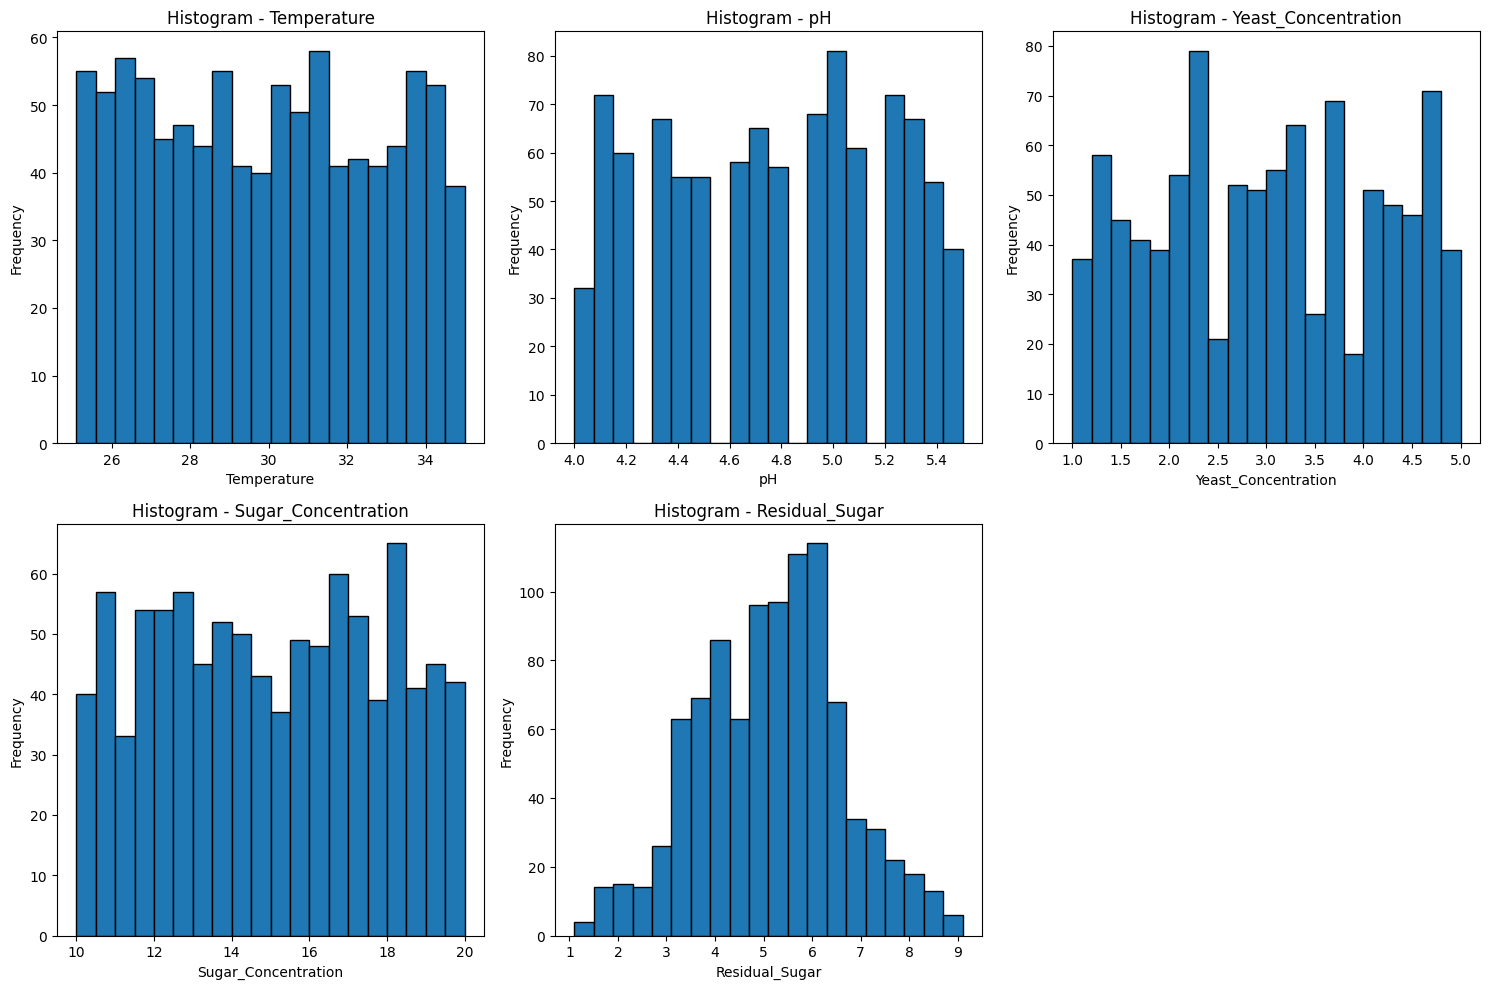

In [12]:
# Create histogram plots for all numeric variables using dfclean
numeric_cols = dfclean.select_dtypes(include=['number']).columns
n_cols = len(numeric_cols)
n_rows = math.ceil(n_cols / 3)
n_subplot_cols = min(3, n_cols)

fig, axes = plt.subplots(n_rows, n_subplot_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten() if n_cols > 1 else [axes]

for i, col in enumerate(numeric_cols):
    axes[i].hist(dfclean[col].dropna(), bins=20, edgecolor='black')
    axes[i].set_title(f'Histogram - {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide empty subplots
for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## Corelinearity

**Prompt:** 

Print correlations matrix and do a plot a heatmap of correlation of dfclean

Correlation Matrix:
                     Temperature        pH  Yeast_Concentration  \
Temperature             1.000000 -0.012451            -0.008779   
pH                     -0.012451  1.000000             0.015833   
Yeast_Concentration    -0.008779  0.015833             1.000000   
Sugar_Concentration    -0.014722  0.003738             0.006277   
Residual_Sugar         -0.011687 -0.026576            -0.510320   

                     Sugar_Concentration  Residual_Sugar  
Temperature                    -0.014722       -0.011687  
pH                              0.003738       -0.026576  
Yeast_Concentration             0.006277       -0.510320  
Sugar_Concentration             1.000000        0.102366  
Residual_Sugar                  0.102366        1.000000  


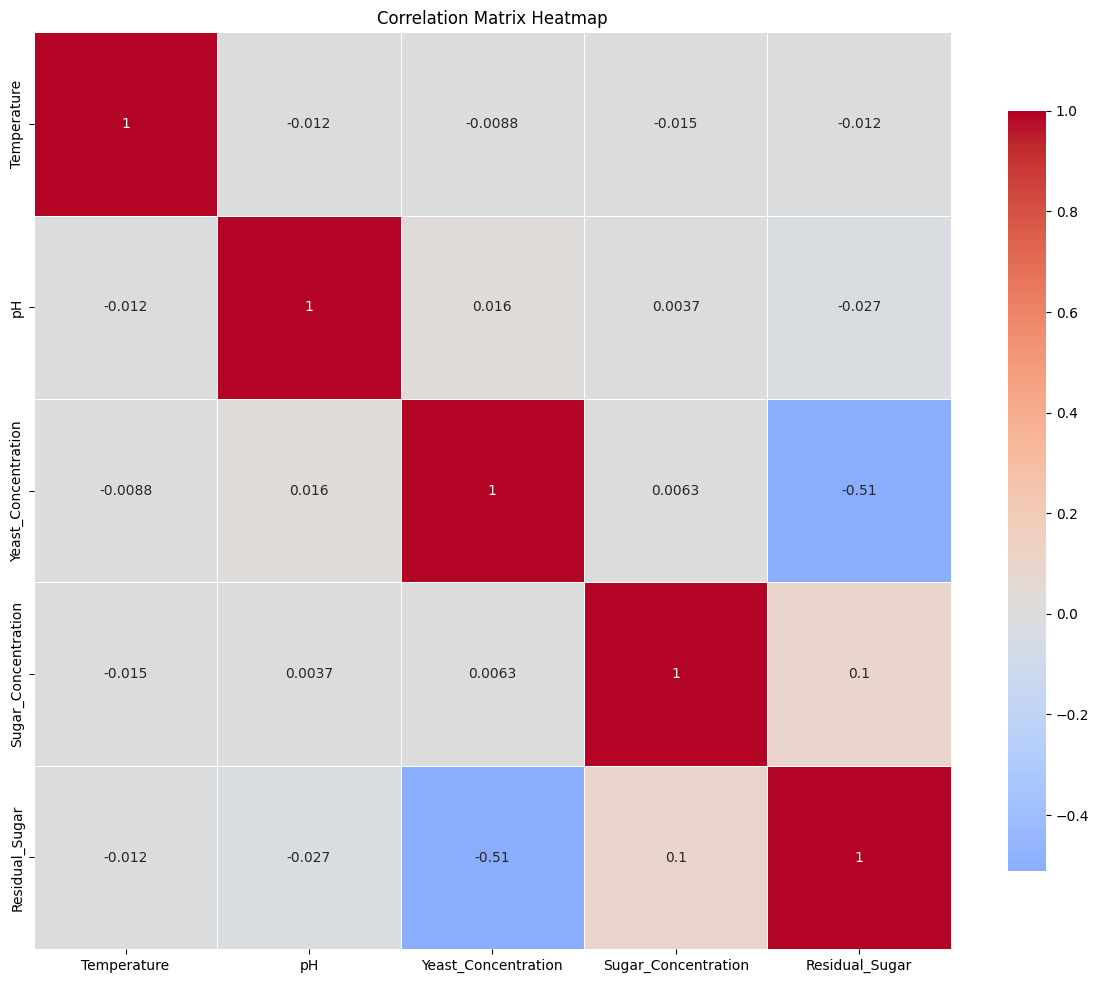

In [13]:
# Print correlation matrix
print("Correlation Matrix:")
correlation_matrix = dfclean.corr()
print(correlation_matrix)

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

# Data Prep for Model

## Define Features and Target

**Prompt:**

'Residual_Sugar' is Y variables and Temperature','pH','Yeast_Concentration','Sugar_Concentration' are features. Plot scatter plot between features and Y

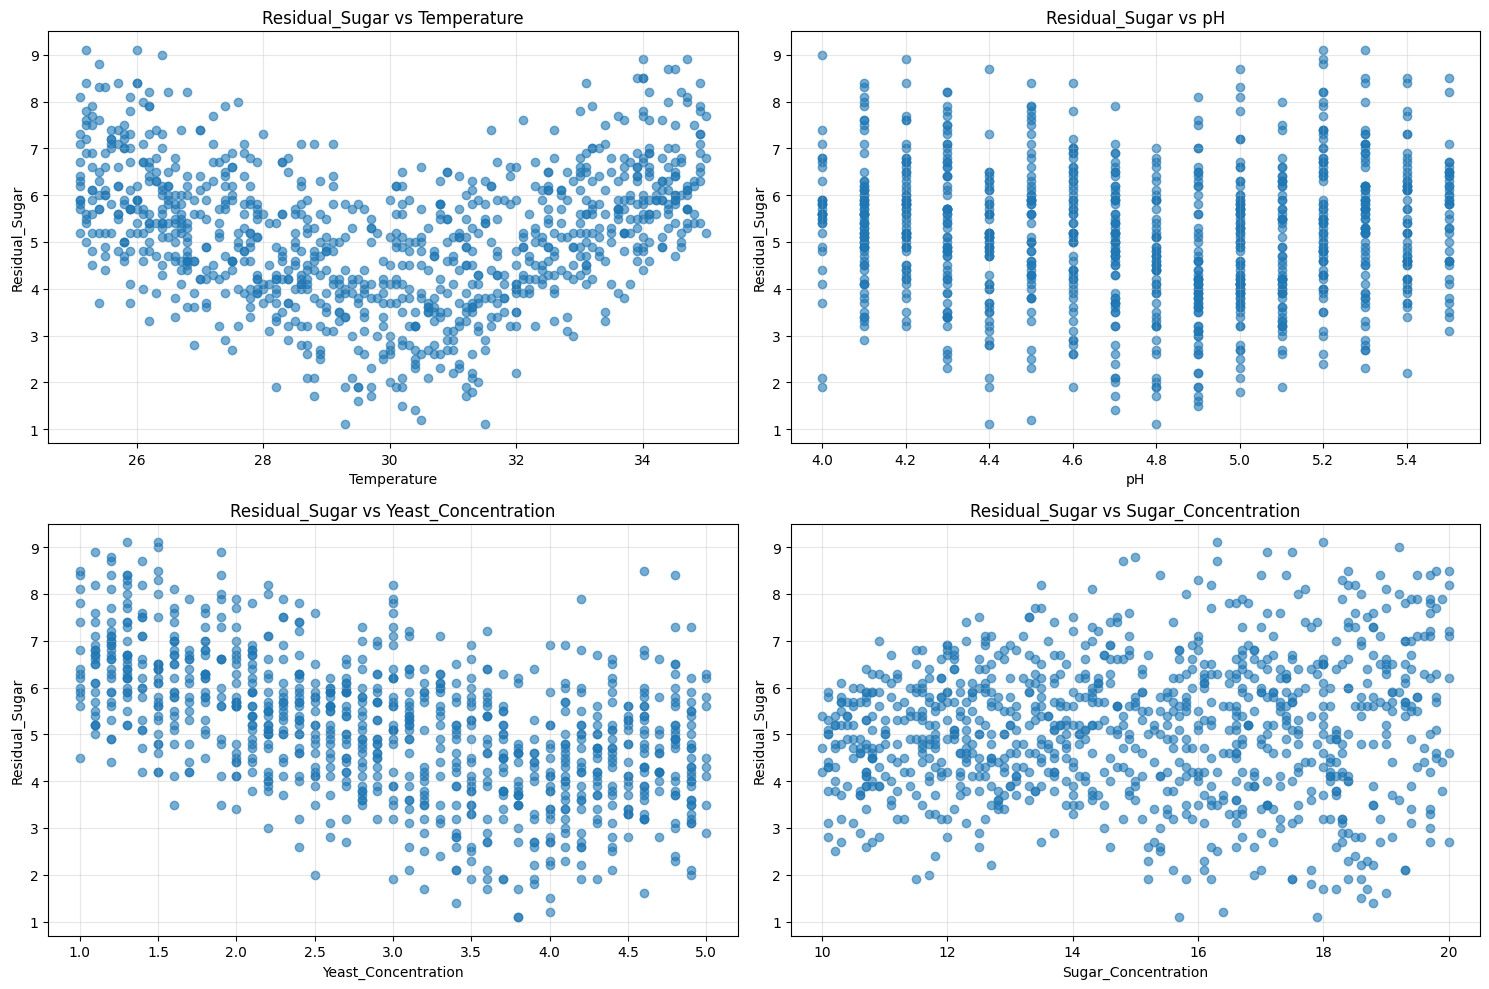

In [14]:
# Define Y variable and features
y_var = 'Residual_Sugar'
features = ['Temperature', 'pH', 'Yeast_Concentration', 'Sugar_Concentration']

# Create scatter plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].scatter(dfclean[feature], dfclean[y_var], alpha=0.6)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(y_var)
    axes[i].set_title(f'{y_var} vs {feature}')
    axes[i].grid(True, alpha=0.3)

# Hide empty subplots if any
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## Feature Engineering with Data Scaling

**Prompt:**

Normalize X data using StandarScaler and plot histogram

# Model Selection


![Model guide](./assets/model_selection.png)

# XGBoost Model


**Note:** 

Since this is tree model which does not require feature scaling in general, we **will not** use scaled data for model fitting


<p style="font-size:25px; color:blue;text-align:left;">
    XGBoost
</p>



    🔘 XGBoost is a machine learning algorithm that builds multiple decision trees one after another, where each new tree tries to fix the errors made by the previous trees.

    🔘 It uses a method called gradient boosting, which helps improve prediction accuracy by combining many weak models into a stronger one.
    
    🔘The algorithm includes features to prevent overfitting, such as regularization and controlling how the trees grow.

    🔘 XGBoost can handle large datasets efficiently by using parallel processing to speed up training.

    🔘 It is widely used because it is fast, accurate, and works well for tasks like classification and regression, making it popular among beginners and experts alike.

![xgboost](./assets/xgboost.png)

References:

[XGboost paper](https://arxiv.org/abs/1603.02754)

## Data Split

![data split](./assets/datasplit.jpg)

**Prompt**

Split the data into training and testing sets.

## Hyperparameter Optimization
| Parameter             | Purpose                              | Simple Explanation | Default |
|-----------------------|--------------------------------------|--------------------|---------|
| `n_estimators`        | Number of decision trees             | More trees = more learning, but too many can overdo it. Like having more experts vote on the answer. <br> ✅ **Typical tuned range:** 100–300 | `100` |
| `max_depth`           | How deep each tree can go            | Controls complexity. Deeper = more detailed rules, but may memorize data. Like allowing more "if-then" steps. <br> ✅ **Typical tuned range:** 3–10 | `6` |
| `learning_rate`       | How fast the model learns            | Smaller = slow, steady improvement. Larger = fast but may overshoot. Like step size toward the goal. <br> ✅ **Typical tuned range:** 0.01 – 0.3 | `0.3` |
| `subsample`           | % of data used for each tree         | Uses only part of the data per tree to avoid overfitting. Like asking different small groups to learn. <br> ✅ **Typical tuned range:** 0.6 – 1.0 | `1.0` |
| `colsample_bytree`    | % of features used per tree          | Each tree uses only some columns (e.g., size, age, location). Prevents over-reliance on one feature. <br> ✅ **Typical tuned range:** 0.6 – 1.0 | `1.0` |
| `min_child_weight`    | Minimum data in a prediction box     | Stops trees from splitting too small. “Don’t make a rule unless at least a few examples agree.” <br> ✅ **Typical tuned range:** 1 – 7 | `1` |
| `gamma`               | Minimum improvement to split         | Only split if it clearly helps. Like saying: “Only add a rule if it makes things meaningfully better.” <br> ✅ **Typical tuned range:** 0 – 0.5 | `0` |
| `reg_alpha`           | Simplifies model (L1 penalty)        | Shrinks weak signals to zero. Helps when many inputs are noisy or irrelevant. <br> ✅ **Typical tuned range:** 0 – 1 | `0` |
| `reg_lambda`          | Smooths predictions (L2 penalty)     | Keeps predictions stable by avoiding extreme values. Works like a safety brake. <br> ✅ **Typical tuned range:** 1 – 2 | `1` |

### Grid Search

🔘 Grid Search is like trying all possible combinations of settings to find the best one — just like testing different oven temperatures and baking times to make the perfect cake. 

🔘 It automatically tests every combination of hyperparameters (like learning_rate=0.1, max_depth=6) you specify, trains the model each time, and picks the one with the best performance. 

🔘 It uses cross-validation (e.g., 5-fold) to ensure the result is reliable and not just lucky on one data split. 

🔘 Think of it as "brute-force tuning" — thorough, systematic, and great for finding optimal settings, but can be slow with too many parameters. 

*Example: If you test 5 values for max_depth, and 5 values for n_estimators, Grid Search will try all 5x5=25 combinations and tell you which works best.* 
     


![grid](./assets/grid_search.png)

## K-fold Cross validation

In K-fold cross-validation, the data is split into K equal parts (folds). The model is trained K times, each time leaving out one fold for testing and using the other K-1 folds for training. The final performance metric is averaged over all K runs. This approach uses the entire dataset for both training and testing, providing a more reliable estimate of model performance.


**Prompt:**

Finetune below hyperparamters of xgboost with 5 fold cross validation. Print R2/RMSE of testing and training

```
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0]
}

```

## Training

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb


# Define features and target
X = dfclean[['Temperature', 'pH', 'Yeast_Concentration', 'Sugar_Concentration']]
y = dfclean['Residual_Sugar']

# Split data into 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0]
}

# Create XGBoost regressor
xgb_model = xgb.XGBRegressor(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_

# Make predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Print results
print("Best Parameters:", grid_search.best_params_)
print("\nTraining Metrics:")
print(f"R²: {train_r2:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print("\nTesting Metrics:")
print(f"R²: {test_r2:.4f}")
print(f"RMSE: {test_rmse:.4f}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.6}

Training Metrics:
R²: 0.8699
RMSE: 0.5291

Testing Metrics:
R²: 0.8111
RMSE: 0.6399


# Model Evaluation

**Prompt:**
Evaluate the model as below.
1. Plot actual vs predicted values for both train and test
2. Print R2/RMSE on the graph
3. Plot residual for both training and testing


## Residual Plot

![residual](./assets/residualplot.png)


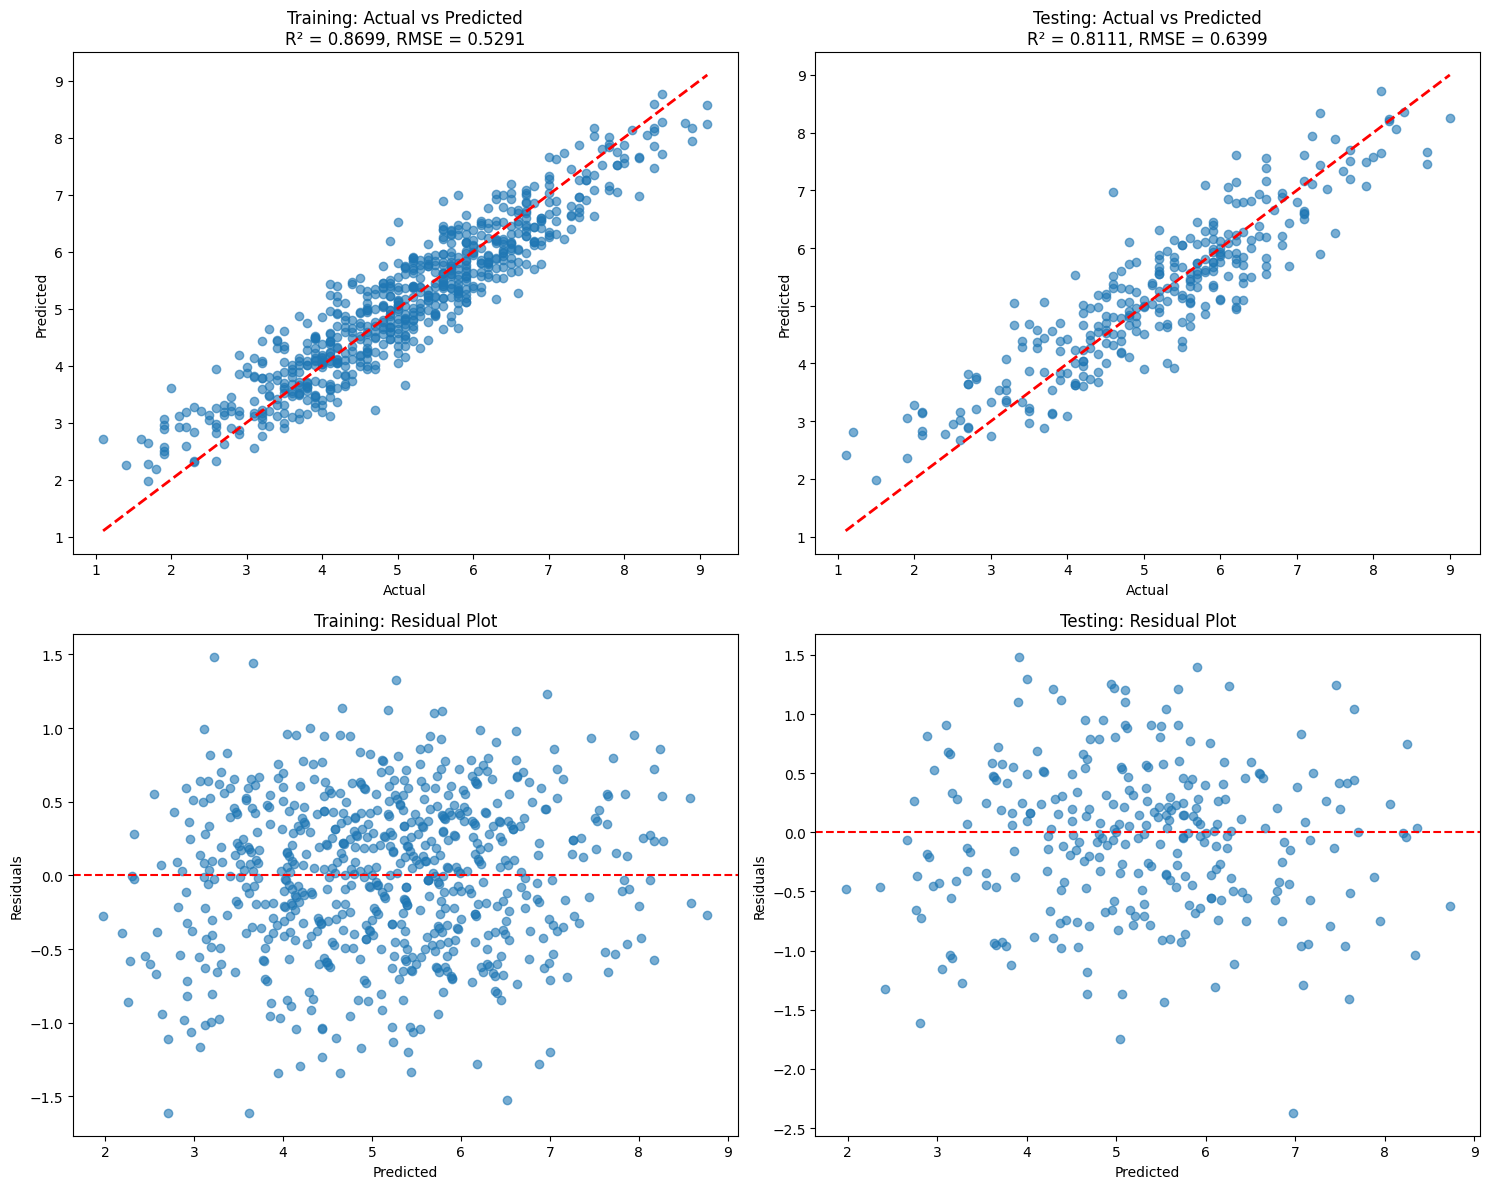

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.6}

Training Metrics:
R²: 0.8699
RMSE: 0.5291

Testing Metrics:
R²: 0.8111
RMSE: 0.6399


In [16]:
# Get best model
best_model = grid_search.best_estimator_

# Make predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Create evaluation plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Actual vs Predicted for Training
axes[0, 0].scatter(y_train, y_train_pred, alpha=0.6)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual')
axes[0, 0].set_ylabel('Predicted')
axes[0, 0].set_title(f'Training: Actual vs Predicted\nR² = {train_r2:.4f}, RMSE = {train_rmse:.4f}')

# Plot 2: Actual vs Predicted for Testing
axes[0, 1].scatter(y_test, y_test_pred, alpha=0.6)
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual')
axes[0, 1].set_ylabel('Predicted')
axes[0, 1].set_title(f'Testing: Actual vs Predicted\nR² = {test_r2:.4f}, RMSE = {test_rmse:.4f}')

# Plot 3: Residuals for Training
train_residuals = y_train - y_train_pred
axes[1, 0].scatter(y_train_pred, train_residuals, alpha=0.6)
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Training: Residual Plot')

# Plot 4: Residuals for Testing
test_residuals = y_test - y_test_pred
axes[1, 1].scatter(y_test_pred, test_residuals, alpha=0.6)
axes[1, 1].axhline(y=0, color='r', linestyle='--')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Testing: Residual Plot')

plt.tight_layout()
plt.show()

# Print metrics
print("Best Parameters:", grid_search.best_params_)
print("\nTraining Metrics:")
print(f"R²: {train_r2:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print("\nTesting Metrics:")
print(f"R²: {test_r2:.4f}")
print(f"RMSE: {test_rmse:.4f}")

## Save final model

**Prompt:** 

Save the model in pickle format

# Model Explanation with XAI